In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
data=pd.read_csv("/content/diabetes.csv") #data değişkenine dataset yüklenir.

In [ ]:
data.head() #ilk 5 satır çağırıldı.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
feature_cols=['Pregnancies','Insulin','BMI','Age','Glucose','BloodPressure','DiabetesPedigreeFunction','SkinThickness']
x=data[feature_cols]   #feature_cols değişkenine train etmek isteğimiz sütunlar liste olarak aktarıldı.
y=data.Outcome         #y test değeri

In [8]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [9]:
x_train.shape #x traindeki toplam sütun ve satırları verdi.

(576, 8)

In [10]:
from sklearn import linear_model
logreg= linear_model.LogisticRegression(max_iter=500) #500 maksimum yineleme sayısı demek
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [11]:
y_pred=logreg.predict(x_test)

In [12]:
print("test accuracy: {}".format(logreg.score(x_test,y_test)))    #test accuracy dediğimizde elimizdeki her değer için yüzde 79 bir doğruluk yakalandı.
print("train accuracy: {}".format(logreg.score(x_train,y_train)))

test accuracy: 0.796875
train accuracy: 0.7604166666666666


In [13]:
import sklearn.metrics as metrics
print("Accuracy:", metrics.accuracy_score(y_test,y_pred)) #Accuracy değeri modelde doğru tahmin ettiğimiz alanların toplam veri kümesine oranı ile hesaplanmaktır.
print("Precision:",metrics.precision_score(y_test,y_pred))  #Accuracy = (TP + TN) / (TP + FP + TN + FN)
print("Recall:",metrics.recall_score(y_test,y_pred))        #Precision = TP / (TP + FP)
                                                            #Recall = TP / (TP + FN)

Accuracy: 0.796875
Precision: 0.7346938775510204
Recall: 0.5806451612903226


Text(42.0, 0.5, 'y test')

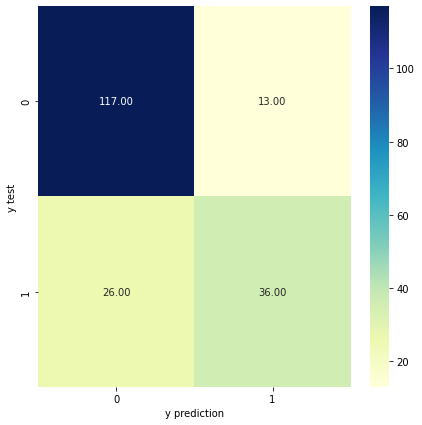

In [14]:
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)      #confusion matriste y prediction ve y test verileri gösterildi.
plt.figure(figsize=(7,7))
sns.heatmap(cnf_matrix,annot=True,fmt=".2f",cmap="YlGnBu")
plt.xlabel("y prediction")
plt.ylabel("y test")

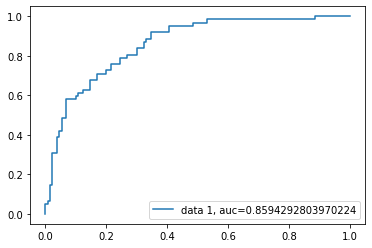

In [15]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()